In [1]:
import tensorflow as tf
import IPython.display as display
from IPython.display import clear_output

import os
import pandas as pd
import numpy as np
import imghdr
import glob
import matplotlib.pyplot as plt
import pickle

import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import PIL
import joblib

from PIL import Image
from PIL import UnidentifiedImageError

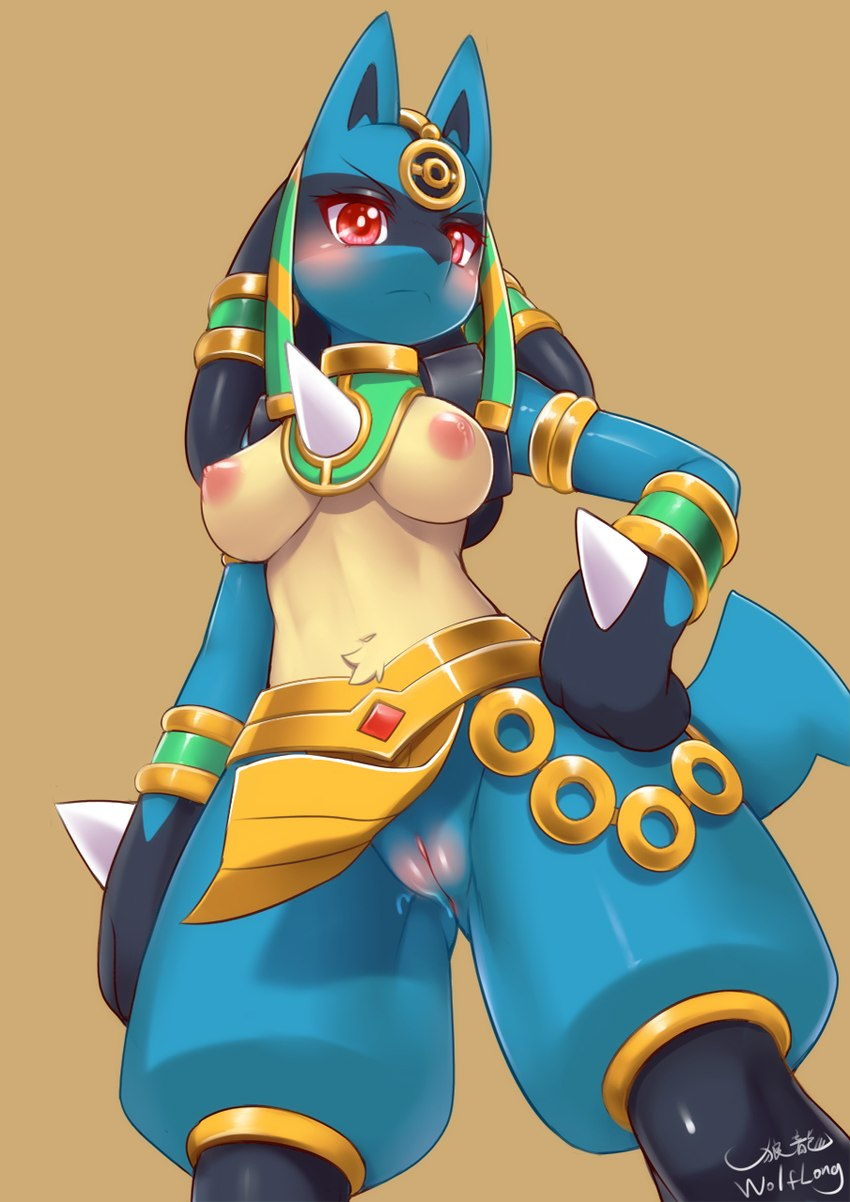

In [2]:
image_path = "./horny_pics/wolflong/wolflong_post_3232856.jpg"
display.display(display.Image(image_path))

In [3]:
img_raw = tf.io.read_file(image_path)
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)


(1202, 850, 3)
<dtype: 'uint8'>


In [4]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [256,256])
  image /= 255.0  # normalize to [0,1] range

  return image

def load_and_preprocess_image(path):
  image = tf.io.read_file(path)

  return preprocess_image(image)



In [5]:
import PIL


from PIL import Image
from PIL import UnidentifiedImageError

try:
    gif = Image.open('horny_pics\wolflong\wolflong_post_1344567.jpg')
except PIL.UnidentifiedImageError:
    print("This was a flash file.")
else:
    print("JPG file.")

# make it into a function

def broken_jpg(img_path):
    """
    img_path: it takes an image path, read it and checking the type
    Return True if it is broken.
    """
    try:
        gif = Image.open(img_path)
    except PIL.UnidentifiedImageError:
        return True
    else:
        # check if the img is a gif converted to jpg
        try:
            gif.seek(1)
        except EOFError:
            return False
        else:
            return True
        # I prob don't need this next return
        return False

This was a flash file.


In [6]:
rootdir =  os.path.dirname(os.path.abspath("ANN_Example.ipynb"))
print("This is the roodir: ", rootdir)


file_list = []

for subdir, dirs, files in os.walk(rootdir):
    lim = 0
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file
        # skip the broken file
        if broken_jpg(filepath):
            continue
        else:
            # we only want 2 from each
            if lim == 2:
                break

            if filepath.endswith(".jpg"):
                print(filepath)
                file_list.append(filepath)
                lim +=1
print(file_list )

This is the roodir:  S:\E621\E621_ANN
S:\E621\E621_ANN\horny_pics\amethystdust\amethystdust_post_1003079.jpg
S:\E621\E621_ANN\horny_pics\amethystdust\amethystdust_post_1119125.jpg
S:\E621\E621_ANN\horny_pics\ancesra\ancesra_post_1161836.jpg
S:\E621\E621_ANN\horny_pics\ancesra\ancesra_post_1204574.jpg
S:\E621\E621_ANN\horny_pics\buta99\buta99_post_1867441.jpg
S:\E621\E621_ANN\horny_pics\buta99\buta99_post_1966909.jpg
S:\E621\E621_ANN\horny_pics\dragoon86\dragoon86_post_101910.jpg
S:\E621\E621_ANN\horny_pics\dragoon86\dragoon86_post_101911.jpg
S:\E621\E621_ANN\horny_pics\esokir\esokir_post_1013255.jpg
S:\E621\E621_ANN\horny_pics\esokir\esokir_post_1016548.jpg
S:\E621\E621_ANN\horny_pics\faeki\faeki_post_1208045.jpg
S:\E621\E621_ANN\horny_pics\faeki\faeki_post_1350233.jpg
S:\E621\E621_ANN\horny_pics\kame_3\kame_3_post_1017056.jpg
S:\E621\E621_ANN\horny_pics\kame_3\kame_3_post_1026538.jpg
S:\E621\E621_ANN\horny_pics\miles_df\miles_df_post_1001623.jpg
S:\E621\E621_ANN\horny_pics\miles_df\mi

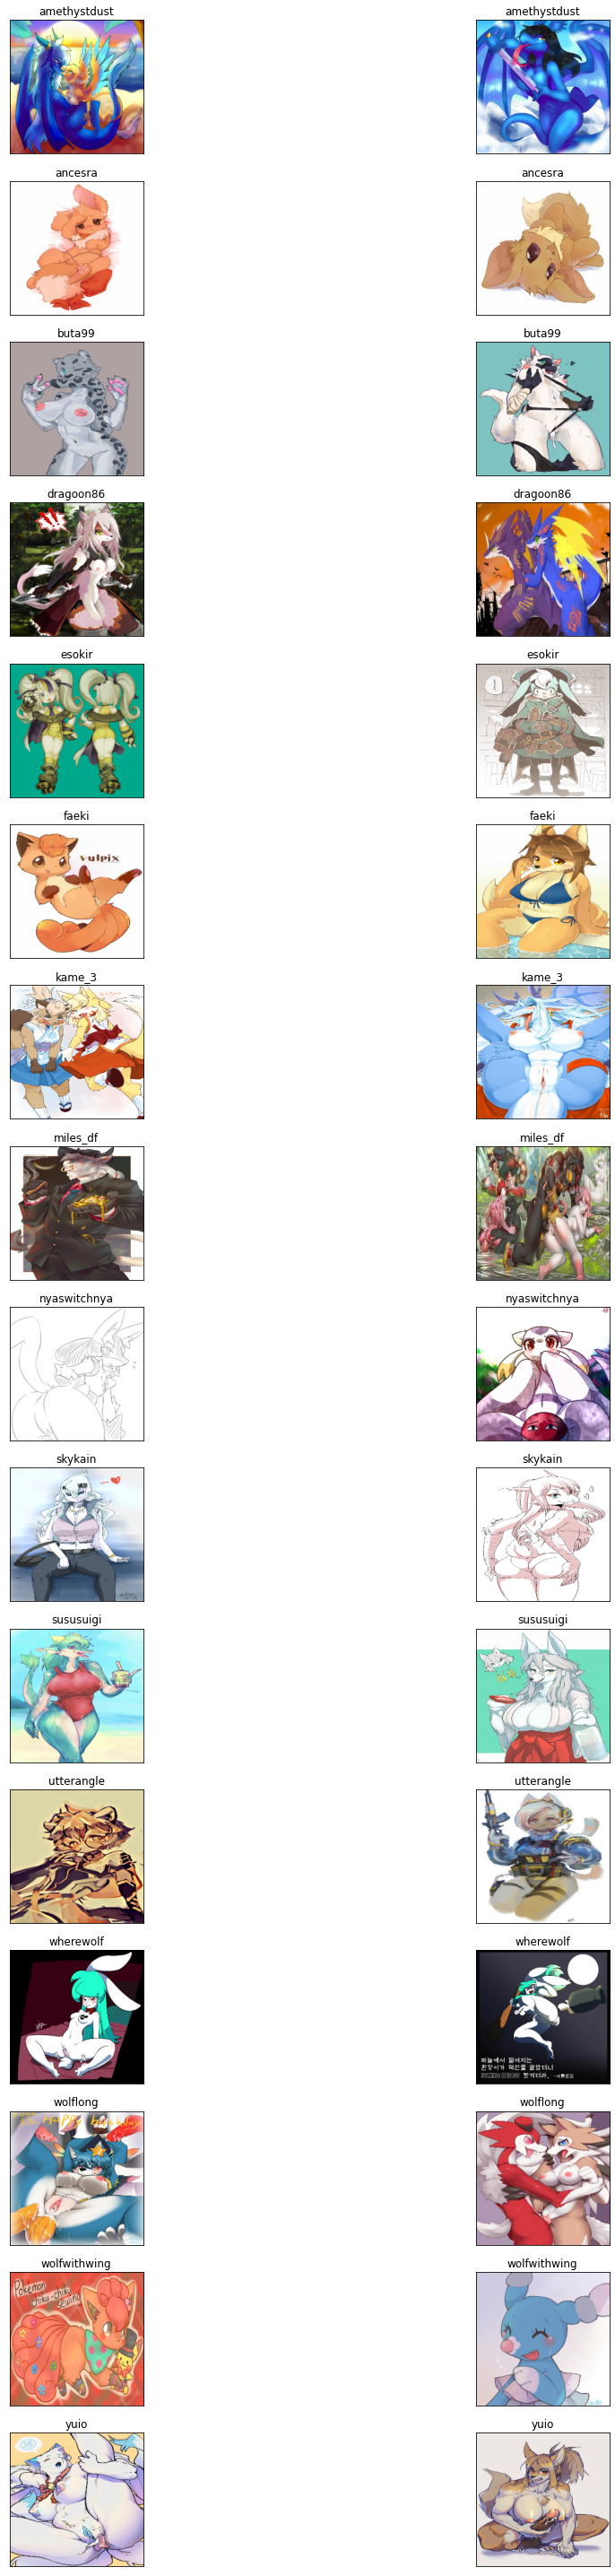

In [8]:
number_of_artists = 16

plt.figure(figsize=(20,40))
for i in range(number_of_artists*2):
    img_path = file_list[i]
    plt.subplot(number_of_artists,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.imshow(load_and_preprocess_image(img_path))
    #print(img_path.split(sep="\\"))
    plt.title(img_path.split(sep="\\")[-2])
plt.tight_layout()
plt.show()

In [9]:
# save the method to a function for loading our data!

    
def data_loader(printing=False):
    """
    param:
    printing:
        Will print Message
    This function will loop through the subdir and find all working JPG files
    Store it as img file to X, artist name in y
    return a Tuple, (X,y) or frame
    """
    
    X ,y = [],[]

    rootdir =  os.path.dirname(os.path.abspath("ANN_Example.ipynb"))
    for subdir, dirs, files in os.walk(rootdir):

        for file in files:
            filepath = subdir + os.sep + file
            # skip the broken file
            if broken_jpg(filepath):
                continue
            else:
                if filepath.endswith(".jpg"):

                    X.append(load_and_preprocess_image(filepath))
                    img_name = file.split(sep="_")[-1]
                    arti_name = file.split(sep="_")[0]
                    y.append(arti_name)
                
                        
                    if printing:
                        print("Loaded art: {}, Artist: {}".format(img_name,arti_name))
    X = np.array(X)

    y = np.array(y)

    print("X.shape: {}".format(X.shape))
    print("y.shape: {}".format(y.shape))

    return (X,y)

In [10]:
X,y = data_loader(printing=True)

Loaded art: 1003079.jpg, Artist: amethystdust
Loaded art: 1119125.jpg, Artist: amethystdust
Loaded art: 1119126.jpg, Artist: amethystdust
Loaded art: 1137461.jpg, Artist: amethystdust
Loaded art: 1137462.jpg, Artist: amethystdust
Loaded art: 1137463.jpg, Artist: amethystdust
Loaded art: 1137465.jpg, Artist: amethystdust
Loaded art: 1137466.jpg, Artist: amethystdust
Loaded art: 1137467.jpg, Artist: amethystdust
Loaded art: 1137468.jpg, Artist: amethystdust
Loaded art: 1137469.jpg, Artist: amethystdust
Loaded art: 1137470.jpg, Artist: amethystdust
Loaded art: 1137472.jpg, Artist: amethystdust
Loaded art: 1137473.jpg, Artist: amethystdust
Loaded art: 1137474.jpg, Artist: amethystdust
Loaded art: 1137476.jpg, Artist: amethystdust
Loaded art: 1137479.jpg, Artist: amethystdust
Loaded art: 1137481.jpg, Artist: amethystdust
Loaded art: 1137482.jpg, Artist: amethystdust
Loaded art: 1137483.jpg, Artist: amethystdust
Loaded art: 1137484.jpg, Artist: amethystdust
Loaded art: 1137485.jpg, Artist: a

Loaded art: 1806406.jpg, Artist: amethystdust
Loaded art: 1820285.jpg, Artist: amethystdust
Loaded art: 1846466.jpg, Artist: amethystdust
Loaded art: 1877574.jpg, Artist: amethystdust
Loaded art: 1903091.jpg, Artist: amethystdust
Loaded art: 1916055.jpg, Artist: amethystdust
Loaded art: 1921141.jpg, Artist: amethystdust
Loaded art: 1922502.jpg, Artist: amethystdust
Loaded art: 1930228.jpg, Artist: amethystdust
Loaded art: 1930688.jpg, Artist: amethystdust
Loaded art: 1947875.jpg, Artist: amethystdust
Loaded art: 1949020.jpg, Artist: amethystdust
Loaded art: 1949333.jpg, Artist: amethystdust
Loaded art: 1953522.jpg, Artist: amethystdust
Loaded art: 1972332.jpg, Artist: amethystdust
Loaded art: 1972610.jpg, Artist: amethystdust
Loaded art: 1973433.jpg, Artist: amethystdust
Loaded art: 1974013.jpg, Artist: amethystdust
Loaded art: 1980280.jpg, Artist: amethystdust
Loaded art: 1980282.jpg, Artist: amethystdust
Loaded art: 1980365.jpg, Artist: amethystdust
Loaded art: 1985331.jpg, Artist: a

Loaded art: 1612020.jpg, Artist: ancesra
Loaded art: 1616711.jpg, Artist: ancesra
Loaded art: 1616887.jpg, Artist: ancesra
Loaded art: 1628130.jpg, Artist: ancesra
Loaded art: 1628619.jpg, Artist: ancesra
Loaded art: 1633670.jpg, Artist: ancesra
Loaded art: 1635218.jpg, Artist: ancesra
Loaded art: 1635909.jpg, Artist: ancesra
Loaded art: 1644122.jpg, Artist: ancesra
Loaded art: 1660137.jpg, Artist: ancesra
Loaded art: 1660805.jpg, Artist: ancesra
Loaded art: 1661922.jpg, Artist: ancesra
Loaded art: 1662734.jpg, Artist: ancesra
Loaded art: 1673319.jpg, Artist: ancesra
Loaded art: 1674551.jpg, Artist: ancesra
Loaded art: 1686914.jpg, Artist: ancesra
Loaded art: 1700300.jpg, Artist: ancesra
Loaded art: 1711973.jpg, Artist: ancesra
Loaded art: 1717890.jpg, Artist: ancesra
Loaded art: 1717891.jpg, Artist: ancesra
Loaded art: 1717892.jpg, Artist: ancesra
Loaded art: 1722520.jpg, Artist: ancesra
Loaded art: 1729895.jpg, Artist: ancesra
Loaded art: 1732224.jpg, Artist: ancesra
Loaded art: 1748

Loaded art: 2580510.jpg, Artist: ancesra
Loaded art: 2580520.jpg, Artist: ancesra
Loaded art: 2580524.jpg, Artist: ancesra
Loaded art: 2581532.jpg, Artist: ancesra
Loaded art: 2581976.jpg, Artist: ancesra
Loaded art: 2600132.jpg, Artist: ancesra
Loaded art: 2601597.jpg, Artist: ancesra
Loaded art: 2609669.jpg, Artist: ancesra
Loaded art: 2609748.jpg, Artist: ancesra
Loaded art: 2609772.jpg, Artist: ancesra
Loaded art: 2609786.jpg, Artist: ancesra
Loaded art: 2609875.jpg, Artist: ancesra
Loaded art: 2626032.jpg, Artist: ancesra
Loaded art: 2629189.jpg, Artist: ancesra
Loaded art: 2640599.jpg, Artist: ancesra
Loaded art: 2647076.jpg, Artist: ancesra
Loaded art: 2647077.jpg, Artist: ancesra
Loaded art: 2647078.jpg, Artist: ancesra
Loaded art: 2647080.jpg, Artist: ancesra
Loaded art: 2647161.jpg, Artist: ancesra
Loaded art: 2652801.jpg, Artist: ancesra
Loaded art: 2692258.jpg, Artist: ancesra
Loaded art: 2692317.jpg, Artist: ancesra
Loaded art: 2708959.jpg, Artist: ancesra
Loaded art: 2716

Loaded art: 2775304.jpg, Artist: buta99
Loaded art: 2775324.jpg, Artist: buta99
Loaded art: 2775347.jpg, Artist: buta99
Loaded art: 2775362.jpg, Artist: buta99
Loaded art: 2775368.jpg, Artist: buta99
Loaded art: 2775450.jpg, Artist: buta99
Loaded art: 2775473.jpg, Artist: buta99
Loaded art: 2775476.jpg, Artist: buta99
Loaded art: 2775486.jpg, Artist: buta99
Loaded art: 2775518.jpg, Artist: buta99
Loaded art: 2775527.jpg, Artist: buta99
Loaded art: 2775531.jpg, Artist: buta99
Loaded art: 2775540.jpg, Artist: buta99
Loaded art: 2775544.jpg, Artist: buta99
Loaded art: 2775549.jpg, Artist: buta99
Loaded art: 2775610.jpg, Artist: buta99
Loaded art: 2775617.jpg, Artist: buta99
Loaded art: 2775620.jpg, Artist: buta99
Loaded art: 2775624.jpg, Artist: buta99
Loaded art: 2775637.jpg, Artist: buta99
Loaded art: 2775639.jpg, Artist: buta99
Loaded art: 2775641.jpg, Artist: buta99
Loaded art: 2775642.jpg, Artist: buta99
Loaded art: 2775645.jpg, Artist: buta99
Loaded art: 2775650.jpg, Artist: buta99


Loaded art: 184291.jpg, Artist: dragoon86
Loaded art: 1871023.jpg, Artist: dragoon86
Loaded art: 1871024.jpg, Artist: dragoon86
Loaded art: 187904.jpg, Artist: dragoon86
Loaded art: 187905.jpg, Artist: dragoon86
Loaded art: 1890475.jpg, Artist: dragoon86
Loaded art: 189576.jpg, Artist: dragoon86
Loaded art: 189577.jpg, Artist: dragoon86
Loaded art: 1911765.jpg, Artist: dragoon86
Loaded art: 1911767.jpg, Artist: dragoon86
Loaded art: 192373.jpg, Artist: dragoon86
Loaded art: 193432.jpg, Artist: dragoon86
Loaded art: 193433.jpg, Artist: dragoon86
Loaded art: 1937808.jpg, Artist: dragoon86
Loaded art: 1937809.jpg, Artist: dragoon86
Loaded art: 1969372.jpg, Artist: dragoon86
Loaded art: 197374.jpg, Artist: dragoon86
Loaded art: 197375.jpg, Artist: dragoon86
Loaded art: 197377.jpg, Artist: dragoon86
Loaded art: 1987718.jpg, Artist: dragoon86
Loaded art: 1987719.jpg, Artist: dragoon86
Loaded art: 201572.jpg, Artist: dragoon86
Loaded art: 201573.jpg, Artist: dragoon86
Loaded art: 2032818.jpg,

Loaded art: 807141.jpg, Artist: dragoon86
Loaded art: 81095.jpg, Artist: dragoon86
Loaded art: 812766.jpg, Artist: dragoon86
Loaded art: 812767.jpg, Artist: dragoon86
Loaded art: 812768.jpg, Artist: dragoon86
Loaded art: 81900.jpg, Artist: dragoon86
Loaded art: 82308.jpg, Artist: dragoon86
Loaded art: 829458.jpg, Artist: dragoon86
Loaded art: 829459.jpg, Artist: dragoon86
Loaded art: 829460.jpg, Artist: dragoon86
Loaded art: 832031.jpg, Artist: dragoon86
Loaded art: 83360.jpg, Artist: dragoon86
Loaded art: 84492.jpg, Artist: dragoon86
Loaded art: 857904.jpg, Artist: dragoon86
Loaded art: 857906.jpg, Artist: dragoon86
Loaded art: 878347.jpg, Artist: dragoon86
Loaded art: 934291.jpg, Artist: dragoon86
Loaded art: 934292.jpg, Artist: dragoon86
Loaded art: 934293.jpg, Artist: dragoon86
Loaded art: 95140.jpg, Artist: dragoon86
Loaded art: 98089.jpg, Artist: dragoon86
Loaded art: 98091.jpg, Artist: dragoon86
Loaded art: 999874.jpg, Artist: dragoon86
Loaded art: 999875.jpg, Artist: dragoon86


Loaded art: 289243.jpg, Artist: esokir
Loaded art: 2894199.jpg, Artist: esokir
Loaded art: 2894283.jpg, Artist: esokir
Loaded art: 2898408.jpg, Artist: esokir
Loaded art: 2898416.jpg, Artist: esokir
Loaded art: 290721.jpg, Artist: esokir
Loaded art: 290724.jpg, Artist: esokir
Loaded art: 290725.jpg, Artist: esokir
Loaded art: 290727.jpg, Artist: esokir
Loaded art: 2911095.jpg, Artist: esokir
Loaded art: 2925704.jpg, Artist: esokir
Loaded art: 2927629.jpg, Artist: esokir
Loaded art: 2927631.jpg, Artist: esokir
Loaded art: 2928074.jpg, Artist: esokir
Loaded art: 2931474.jpg, Artist: esokir
Loaded art: 295187.jpg, Artist: esokir
Loaded art: 295188.jpg, Artist: esokir
Loaded art: 295189.jpg, Artist: esokir
Loaded art: 295190.jpg, Artist: esokir
Loaded art: 295191.jpg, Artist: esokir
Loaded art: 295193.jpg, Artist: esokir
Loaded art: 295194.jpg, Artist: esokir
Loaded art: 295195.jpg, Artist: esokir
Loaded art: 295196.jpg, Artist: esokir
Loaded art: 295197.jpg, Artist: esokir
Loaded art: 295

Loaded art: 9695.jpg, Artist: esokir
Loaded art: 9698.jpg, Artist: esokir
Loaded art: 980353.jpg, Artist: esokir
Loaded art: 99352.jpg, Artist: esokir
Loaded art: 99353.jpg, Artist: esokir
Loaded art: 1208045.jpg, Artist: faeki
Loaded art: 1350233.jpg, Artist: faeki
Loaded art: 1427016.jpg, Artist: faeki
Loaded art: 1611304.jpg, Artist: faeki
Loaded art: 1611307.jpg, Artist: faeki
Loaded art: 1642349.jpg, Artist: faeki
Loaded art: 1642355.jpg, Artist: faeki
Loaded art: 1666121.jpg, Artist: faeki
Loaded art: 1678942.jpg, Artist: faeki
Loaded art: 1679093.jpg, Artist: faeki
Loaded art: 1679096.jpg, Artist: faeki
Loaded art: 1719705.jpg, Artist: faeki
Loaded art: 1722251.jpg, Artist: faeki
Loaded art: 1737103.jpg, Artist: faeki
Loaded art: 1750741.jpg, Artist: faeki
Loaded art: 1759960.jpg, Artist: faeki
Loaded art: 1759967.jpg, Artist: faeki
Loaded art: 1759972.jpg, Artist: faeki
Loaded art: 1773444.jpg, Artist: faeki
Loaded art: 1773446.jpg, Artist: faeki
Loaded art: 1773455.jpg, Artist

Loaded art: 1017056.jpg, Artist: kame
Loaded art: 1026538.jpg, Artist: kame
Loaded art: 1026539.jpg, Artist: kame
Loaded art: 1026540.jpg, Artist: kame
Loaded art: 1026545.jpg, Artist: kame
Loaded art: 1056708.jpg, Artist: kame
Loaded art: 1073909.jpg, Artist: kame
Loaded art: 1097759.jpg, Artist: kame
Loaded art: 1103297.jpg, Artist: kame
Loaded art: 114183.jpg, Artist: kame
Loaded art: 1146892.jpg, Artist: kame
Loaded art: 1148022.jpg, Artist: kame
Loaded art: 1148023.jpg, Artist: kame
Loaded art: 1148024.jpg, Artist: kame
Loaded art: 1155260.jpg, Artist: kame
Loaded art: 117087.jpg, Artist: kame
Loaded art: 117088.jpg, Artist: kame
Loaded art: 1254435.jpg, Artist: kame
Loaded art: 1254437.jpg, Artist: kame
Loaded art: 1259258.jpg, Artist: kame
Loaded art: 1262484.jpg, Artist: kame
Loaded art: 1262493.jpg, Artist: kame
Loaded art: 1262496.jpg, Artist: kame
Loaded art: 1263676.jpg, Artist: kame
Loaded art: 1264483.jpg, Artist: kame
Loaded art: 1267337.jpg, Artist: kame
Loaded art: 127

Loaded art: 2610670.jpg, Artist: kame
Loaded art: 2617800.jpg, Artist: kame
Loaded art: 2649457.jpg, Artist: kame
Loaded art: 2672512.jpg, Artist: kame
Loaded art: 2677822.jpg, Artist: kame
Loaded art: 2677825.jpg, Artist: kame
Loaded art: 2692658.jpg, Artist: kame
Loaded art: 2694696.jpg, Artist: kame
Loaded art: 2695650.jpg, Artist: kame
Loaded art: 2697536.jpg, Artist: kame
Loaded art: 2700717.jpg, Artist: kame
Loaded art: 2702994.jpg, Artist: kame
Loaded art: 2707155.jpg, Artist: kame
Loaded art: 2707354.jpg, Artist: kame
Loaded art: 2716422.jpg, Artist: kame
Loaded art: 2719282.jpg, Artist: kame
Loaded art: 2721103.jpg, Artist: kame
Loaded art: 2722039.jpg, Artist: kame
Loaded art: 2750542.jpg, Artist: kame
Loaded art: 2751472.jpg, Artist: kame
Loaded art: 2752134.jpg, Artist: kame
Loaded art: 2757900.jpg, Artist: kame
Loaded art: 2771011.jpg, Artist: kame
Loaded art: 2779330.jpg, Artist: kame
Loaded art: 2784747.jpg, Artist: kame
Loaded art: 2789868.jpg, Artist: kame
Loaded art: 

Loaded art: 1063737.jpg, Artist: miles
Loaded art: 1077346.jpg, Artist: miles
Loaded art: 1077349.jpg, Artist: miles
Loaded art: 1077354.jpg, Artist: miles
Loaded art: 1078300.jpg, Artist: miles
Loaded art: 1078301.jpg, Artist: miles
Loaded art: 1078302.jpg, Artist: miles
Loaded art: 1082405.jpg, Artist: miles
Loaded art: 1083249.jpg, Artist: miles
Loaded art: 1085169.jpg, Artist: miles
Loaded art: 1086005.jpg, Artist: miles
Loaded art: 1087926.jpg, Artist: miles
Loaded art: 1089814.jpg, Artist: miles
Loaded art: 1099461.jpg, Artist: miles
Loaded art: 1101280.jpg, Artist: miles
Loaded art: 1103681.jpg, Artist: miles
Loaded art: 1105622.jpg, Artist: miles
Loaded art: 1107099.jpg, Artist: miles
Loaded art: 1107885.jpg, Artist: miles
Loaded art: 1108276.jpg, Artist: miles
Loaded art: 1113907.jpg, Artist: miles
Loaded art: 1114316.jpg, Artist: miles
Loaded art: 111630.jpg, Artist: miles
Loaded art: 111632.jpg, Artist: miles
Loaded art: 1119290.jpg, Artist: miles
Loaded art: 1121104.jpg, Ar

Loaded art: 1792131.jpg, Artist: miles
Loaded art: 1792907.jpg, Artist: miles
Loaded art: 1800026.jpg, Artist: miles
Loaded art: 1802979.jpg, Artist: miles
Loaded art: 18065.jpg, Artist: miles
Loaded art: 1814630.jpg, Artist: miles
Loaded art: 18147.jpg, Artist: miles
Loaded art: 1818096.jpg, Artist: miles
Loaded art: 1828973.jpg, Artist: miles
Loaded art: 1829787.jpg, Artist: miles
Loaded art: 1832424.jpg, Artist: miles
Loaded art: 1841304.jpg, Artist: miles
Loaded art: 1844835.jpg, Artist: miles
Loaded art: 1845773.jpg, Artist: miles
Loaded art: 1856413.jpg, Artist: miles
Loaded art: 18637.jpg, Artist: miles
Loaded art: 1867239.jpg, Artist: miles
Loaded art: 1873867.jpg, Artist: miles
Loaded art: 1876677.jpg, Artist: miles
Loaded art: 1882748.jpg, Artist: miles
Loaded art: 189322.jpg, Artist: miles
Loaded art: 189324.jpg, Artist: miles
Loaded art: 1908826.jpg, Artist: miles
Loaded art: 1920901.jpg, Artist: miles
Loaded art: 192155.jpg, Artist: miles
Loaded art: 1921699.jpg, Artist: m

Loaded art: 3170816.jpg, Artist: miles
Loaded art: 3181226.jpg, Artist: miles
Loaded art: 3215137.jpg, Artist: miles
Loaded art: 33115.jpg, Artist: miles
Loaded art: 33336.jpg, Artist: miles
Loaded art: 33866.jpg, Artist: miles
Loaded art: 33868.jpg, Artist: miles
Loaded art: 33869.jpg, Artist: miles
Loaded art: 353637.jpg, Artist: miles
Loaded art: 35482.jpg, Artist: miles
Loaded art: 382178.jpg, Artist: miles
Loaded art: 399171.jpg, Artist: miles
Loaded art: 407989.jpg, Artist: miles
Loaded art: 416623.jpg, Artist: miles
Loaded art: 423851.jpg, Artist: miles
Loaded art: 426696.jpg, Artist: miles
Loaded art: 439099.jpg, Artist: miles
Loaded art: 44014.jpg, Artist: miles
Loaded art: 44015.jpg, Artist: miles
Loaded art: 44016.jpg, Artist: miles
Loaded art: 44017.jpg, Artist: miles
Loaded art: 44018.jpg, Artist: miles
Loaded art: 44019.jpg, Artist: miles
Loaded art: 442583.jpg, Artist: miles
Loaded art: 44796.jpg, Artist: miles
Loaded art: 44797.jpg, Artist: miles
Loaded art: 44798.jpg, 

Loaded art: 81512.jpg, Artist: miles
Loaded art: 816643.jpg, Artist: miles
Loaded art: 816726.jpg, Artist: miles
Loaded art: 818230.jpg, Artist: miles
Loaded art: 818993.jpg, Artist: miles
Loaded art: 819441.jpg, Artist: miles
Loaded art: 819442.jpg, Artist: miles
Loaded art: 82162.jpg, Artist: miles
Loaded art: 82163.jpg, Artist: miles
Loaded art: 82164.jpg, Artist: miles
Loaded art: 82165.jpg, Artist: miles
Loaded art: 82166.jpg, Artist: miles
Loaded art: 82167.jpg, Artist: miles
Loaded art: 822418.jpg, Artist: miles
Loaded art: 82327.jpg, Artist: miles
Loaded art: 830404.jpg, Artist: miles
Loaded art: 83420.jpg, Artist: miles
Loaded art: 841154.jpg, Artist: miles
Loaded art: 841853.jpg, Artist: miles
Loaded art: 84196.jpg, Artist: miles
Loaded art: 84370.jpg, Artist: miles
Loaded art: 84371.jpg, Artist: miles
Loaded art: 847089.jpg, Artist: miles
Loaded art: 848273.jpg, Artist: miles
Loaded art: 855832.jpg, Artist: miles
Loaded art: 856603.jpg, Artist: miles
Loaded art: 866677.jpg, 

Loaded art: 2025799.jpg, Artist: nyaswitchnya
Loaded art: 2025810.jpg, Artist: nyaswitchnya
Loaded art: 2025815.jpg, Artist: nyaswitchnya
Loaded art: 2025818.jpg, Artist: nyaswitchnya
Loaded art: 2025820.jpg, Artist: nyaswitchnya
Loaded art: 2025823.jpg, Artist: nyaswitchnya
Loaded art: 2025825.jpg, Artist: nyaswitchnya
Loaded art: 2025828.jpg, Artist: nyaswitchnya
Loaded art: 2025829.jpg, Artist: nyaswitchnya
Loaded art: 2025832.jpg, Artist: nyaswitchnya
Loaded art: 2025834.jpg, Artist: nyaswitchnya
Loaded art: 2025837.jpg, Artist: nyaswitchnya
Loaded art: 2025838.jpg, Artist: nyaswitchnya
Loaded art: 2025842.jpg, Artist: nyaswitchnya
Loaded art: 2025844.jpg, Artist: nyaswitchnya
Loaded art: 2025845.jpg, Artist: nyaswitchnya
Loaded art: 2025847.jpg, Artist: nyaswitchnya
Loaded art: 2025849.jpg, Artist: nyaswitchnya
Loaded art: 2025852.jpg, Artist: nyaswitchnya
Loaded art: 2025856.jpg, Artist: nyaswitchnya
Loaded art: 2025859.jpg, Artist: nyaswitchnya
Loaded art: 2025864.jpg, Artist: n

Loaded art: 180899.jpg, Artist: skykain
Loaded art: 181333.jpg, Artist: skykain
Loaded art: 188020.jpg, Artist: skykain
Loaded art: 1893556.jpg, Artist: skykain
Loaded art: 190280.jpg, Artist: skykain
Loaded art: 1908087.jpg, Artist: skykain
Loaded art: 1908091.jpg, Artist: skykain
Loaded art: 1908092.jpg, Artist: skykain
Loaded art: 1908096.jpg, Artist: skykain
Loaded art: 191228.jpg, Artist: skykain
Loaded art: 193389.jpg, Artist: skykain
Loaded art: 196033.jpg, Artist: skykain
Loaded art: 1966054.jpg, Artist: skykain
Loaded art: 1973502.jpg, Artist: skykain
Loaded art: 1973503.jpg, Artist: skykain
Loaded art: 197723.jpg, Artist: skykain
Loaded art: 2003641.jpg, Artist: skykain
Loaded art: 2003647.jpg, Artist: skykain
Loaded art: 2003648.jpg, Artist: skykain
Loaded art: 2003649.jpg, Artist: skykain
Loaded art: 2003651.jpg, Artist: skykain
Loaded art: 2003652.jpg, Artist: skykain
Loaded art: 2003653.jpg, Artist: skykain
Loaded art: 2003654.jpg, Artist: skykain
Loaded art: 200785.jpg, 

Loaded art: 649494.jpg, Artist: skykain
Loaded art: 649496.jpg, Artist: skykain
Loaded art: 649497.jpg, Artist: skykain
Loaded art: 649502.jpg, Artist: skykain
Loaded art: 649503.jpg, Artist: skykain
Loaded art: 649504.jpg, Artist: skykain
Loaded art: 649510.jpg, Artist: skykain
Loaded art: 649512.jpg, Artist: skykain
Loaded art: 649513.jpg, Artist: skykain
Loaded art: 649520.jpg, Artist: skykain
Loaded art: 649523.jpg, Artist: skykain
Loaded art: 649526.jpg, Artist: skykain
Loaded art: 649528.jpg, Artist: skykain
Loaded art: 649529.jpg, Artist: skykain
Loaded art: 649532.jpg, Artist: skykain
Loaded art: 649533.jpg, Artist: skykain
Loaded art: 652329.jpg, Artist: skykain
Loaded art: 652331.jpg, Artist: skykain
Loaded art: 652387.jpg, Artist: skykain
Loaded art: 652390.jpg, Artist: skykain
Loaded art: 652391.jpg, Artist: skykain
Loaded art: 652392.jpg, Artist: skykain
Loaded art: 652393.jpg, Artist: skykain
Loaded art: 652395.jpg, Artist: skykain
Loaded art: 652396.jpg, Artist: skykain


Loaded art: 2230295.jpg, Artist: sususuigi
Loaded art: 2230311.jpg, Artist: sususuigi
Loaded art: 2230312.jpg, Artist: sususuigi
Loaded art: 2230313.jpg, Artist: sususuigi
Loaded art: 2234093.jpg, Artist: sususuigi
Loaded art: 2250548.jpg, Artist: sususuigi
Loaded art: 2250550.jpg, Artist: sususuigi
Loaded art: 2255906.jpg, Artist: sususuigi
Loaded art: 2265069.jpg, Artist: sususuigi
Loaded art: 2265071.jpg, Artist: sususuigi
Loaded art: 2265073.jpg, Artist: sususuigi
Loaded art: 2274696.jpg, Artist: sususuigi
Loaded art: 2289999.jpg, Artist: sususuigi
Loaded art: 2293671.jpg, Artist: sususuigi
Loaded art: 2293673.jpg, Artist: sususuigi
Loaded art: 2293680.jpg, Artist: sususuigi
Loaded art: 2293681.jpg, Artist: sususuigi
Loaded art: 2312870.jpg, Artist: sususuigi
Loaded art: 2315144.jpg, Artist: sususuigi
Loaded art: 2315344.jpg, Artist: sususuigi
Loaded art: 2315420.jpg, Artist: sususuigi
Loaded art: 2319756.jpg, Artist: sususuigi
Loaded art: 2319759.jpg, Artist: sususuigi
Loaded art:

Loaded art: 2948522.jpg, Artist: sususuigi
Loaded art: 2950913.jpg, Artist: sususuigi
Loaded art: 2953860.jpg, Artist: sususuigi
Loaded art: 2962588.jpg, Artist: sususuigi
Loaded art: 2963145.jpg, Artist: sususuigi
Loaded art: 2968996.jpg, Artist: sususuigi
Loaded art: 2969000.jpg, Artist: sususuigi
Loaded art: 2971653.jpg, Artist: sususuigi
Loaded art: 2973987.jpg, Artist: sususuigi
Loaded art: 2973996.jpg, Artist: sususuigi
Loaded art: 2974005.jpg, Artist: sususuigi
Loaded art: 2977587.jpg, Artist: sususuigi
Loaded art: 2978948.jpg, Artist: sususuigi
Loaded art: 2978958.jpg, Artist: sususuigi
Loaded art: 2984808.jpg, Artist: sususuigi
Loaded art: 2984811.jpg, Artist: sususuigi
Loaded art: 2985965.jpg, Artist: sususuigi
Loaded art: 2990158.jpg, Artist: sususuigi
Loaded art: 2990159.jpg, Artist: sususuigi
Loaded art: 2999762.jpg, Artist: sususuigi
Loaded art: 2999813.jpg, Artist: sususuigi
Loaded art: 2999815.jpg, Artist: sususuigi
Loaded art: 2999819.jpg, Artist: sususuigi
Loaded art:

Loaded art: 3137721.jpg, Artist: utterangle
Loaded art: 3138734.jpg, Artist: utterangle
Loaded art: 3138740.jpg, Artist: utterangle
Loaded art: 3138744.jpg, Artist: utterangle
Loaded art: 3138747.jpg, Artist: utterangle
Loaded art: 3141737.jpg, Artist: utterangle
Loaded art: 3141842.jpg, Artist: utterangle
Loaded art: 3142076.jpg, Artist: utterangle
Loaded art: 3142157.jpg, Artist: utterangle
Loaded art: 3142175.jpg, Artist: utterangle
Loaded art: 3144396.jpg, Artist: utterangle
Loaded art: 3144411.jpg, Artist: utterangle
Loaded art: 3145504.jpg, Artist: utterangle
Loaded art: 3145594.jpg, Artist: utterangle
Loaded art: 3150128.jpg, Artist: utterangle
Loaded art: 3153655.jpg, Artist: utterangle
Loaded art: 3162959.jpg, Artist: utterangle
Loaded art: 3162970.jpg, Artist: utterangle
Loaded art: 3162979.jpg, Artist: utterangle
Loaded art: 3163194.jpg, Artist: utterangle
Loaded art: 3170020.jpg, Artist: utterangle
Loaded art: 3170022.jpg, Artist: utterangle
Loaded art: 3174099.jpg, Artist:

Loaded art: 2299032.jpg, Artist: wherewolf
Loaded art: 2299036.jpg, Artist: wherewolf
Loaded art: 2299040.jpg, Artist: wherewolf
Loaded art: 2307705.jpg, Artist: wherewolf
Loaded art: 2307710.jpg, Artist: wherewolf
Loaded art: 2328243.jpg, Artist: wherewolf
Loaded art: 2386487.jpg, Artist: wherewolf
Loaded art: 2386489.jpg, Artist: wherewolf
Loaded art: 2386493.jpg, Artist: wherewolf
Loaded art: 2386502.jpg, Artist: wherewolf
Loaded art: 2388887.jpg, Artist: wherewolf
Loaded art: 2398156.jpg, Artist: wherewolf
Loaded art: 2476911.jpg, Artist: wherewolf
Loaded art: 2515190.jpg, Artist: wherewolf
Loaded art: 2515206.jpg, Artist: wherewolf
Loaded art: 2515217.jpg, Artist: wherewolf
Loaded art: 2515220.jpg, Artist: wherewolf
Loaded art: 2515221.jpg, Artist: wherewolf
Loaded art: 2515224.jpg, Artist: wherewolf
Loaded art: 2573413.jpg, Artist: wherewolf
Loaded art: 2573416.jpg, Artist: wherewolf
Loaded art: 2631788.jpg, Artist: wherewolf
Loaded art: 2699910.jpg, Artist: wherewolf
Loaded art:

Loaded art: 1923343.jpg, Artist: wolflong
Loaded art: 1925378.jpg, Artist: wolflong
Loaded art: 1930104.jpg, Artist: wolflong
Loaded art: 1930105.jpg, Artist: wolflong
Loaded art: 1930106.jpg, Artist: wolflong
Loaded art: 1941560.jpg, Artist: wolflong
Loaded art: 1952413.jpg, Artist: wolflong
Loaded art: 1952414.jpg, Artist: wolflong
Loaded art: 1952415.jpg, Artist: wolflong
Loaded art: 1958035.jpg, Artist: wolflong
Loaded art: 1967888.jpg, Artist: wolflong
Loaded art: 1978442.jpg, Artist: wolflong
Loaded art: 1978443.jpg, Artist: wolflong
Loaded art: 1983155.jpg, Artist: wolflong
Loaded art: 1986394.jpg, Artist: wolflong
Loaded art: 1991065.jpg, Artist: wolflong
Loaded art: 1991169.jpg, Artist: wolflong
Loaded art: 1998927.jpg, Artist: wolflong
Loaded art: 2036238.jpg, Artist: wolflong
Loaded art: 2036240.jpg, Artist: wolflong
Loaded art: 2039381.jpg, Artist: wolflong
Loaded art: 2047300.jpg, Artist: wolflong
Loaded art: 2063814.jpg, Artist: wolflong
Loaded art: 2093948.jpg, Artist: w

Loaded art: 709972.jpg, Artist: wolflong
Loaded art: 711160.jpg, Artist: wolflong
Loaded art: 711607.jpg, Artist: wolflong
Loaded art: 722331.jpg, Artist: wolflong
Loaded art: 722336.jpg, Artist: wolflong
Loaded art: 722364.jpg, Artist: wolflong
Loaded art: 722388.jpg, Artist: wolflong
Loaded art: 722390.jpg, Artist: wolflong
Loaded art: 722436.jpg, Artist: wolflong
Loaded art: 722437.jpg, Artist: wolflong
Loaded art: 730481.jpg, Artist: wolflong
Loaded art: 736055.jpg, Artist: wolflong
Loaded art: 736056.jpg, Artist: wolflong
Loaded art: 736057.jpg, Artist: wolflong
Loaded art: 736058.jpg, Artist: wolflong
Loaded art: 736059.jpg, Artist: wolflong
Loaded art: 736061.jpg, Artist: wolflong
Loaded art: 755879.jpg, Artist: wolflong
Loaded art: 755881.jpg, Artist: wolflong
Loaded art: 755883.jpg, Artist: wolflong
Loaded art: 755885.jpg, Artist: wolflong
Loaded art: 755886.jpg, Artist: wolflong
Loaded art: 755889.jpg, Artist: wolflong
Loaded art: 763780.jpg, Artist: wolflong
Loaded art: 7807

Loaded art: 2584936.jpg, Artist: yuio
Loaded art: 2639092.jpg, Artist: yuio
Loaded art: 2649476.jpg, Artist: yuio
Loaded art: 2661233.jpg, Artist: yuio
Loaded art: 2673224.jpg, Artist: yuio
Loaded art: 2678846.jpg, Artist: yuio
Loaded art: 2687338.jpg, Artist: yuio
Loaded art: 2726399.jpg, Artist: yuio
Loaded art: 2726400.jpg, Artist: yuio
Loaded art: 2726401.jpg, Artist: yuio
Loaded art: 2726403.jpg, Artist: yuio
Loaded art: 2726406.jpg, Artist: yuio
Loaded art: 2726410.jpg, Artist: yuio
Loaded art: 2726413.jpg, Artist: yuio
Loaded art: 2726423.jpg, Artist: yuio
Loaded art: 2726430.jpg, Artist: yuio
Loaded art: 2727272.jpg, Artist: yuio
Loaded art: 2727277.jpg, Artist: yuio
Loaded art: 2727303.jpg, Artist: yuio
Loaded art: 2727309.jpg, Artist: yuio
Loaded art: 2727322.jpg, Artist: yuio
Loaded art: 2727328.jpg, Artist: yuio
Loaded art: 2728137.jpg, Artist: yuio
Loaded art: 2731519.jpg, Artist: yuio
Loaded art: 2734904.jpg, Artist: yuio
Loaded art: 2744726.jpg, Artist: yuio
Loaded art: 

In [11]:


le = preprocessing.LabelEncoder()
le.fit(y)

le_test = le.transform(y[-3:])
print(le_test)
le_test_inv = le.inverse_transform(le_test)
print(le_test_inv)
print(le_test_inv.shape)
print(len(le_test_inv))
print(type(le_test))

[15 15 15]
['yuio' 'yuio' 'yuio']
(3,)
3
<class 'numpy.ndarray'>


In [12]:
le_y = le.transform(y)
Train_X, Test_X, Train_y, Test_y = train_test_split(X, le_y.reshape(-1,1), test_size = 0.2)
print(Test_y[:10])
print("Train_X.shape: ",Train_X.shape)
print("Train_X[0].shape: ",Train_X[0].shape)
print("Train_y.shape: ",Train_y.shape)

[[10]
 [10]
 [12]
 [ 3]
 [12]
 [ 6]
 [13]
 [ 6]
 [ 0]
 [11]]
Train_X.shape:  (4090, 256, 256, 3)
Train_X[0].shape:  (256, 256, 3)
Train_y.shape:  (4090, 1)


In [13]:
import pickle
arti_16 = (X, y)
with open('arti_16.data', 'wb') as data_file:
 
  # Step 3
    pickle.dump(arti_16 , data_file)

In [ ]:
# with open('arti_16.data', 'rb') as data_file:

#     data = pickle.load(data_file)
#     print(data)


S:\Aconda\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


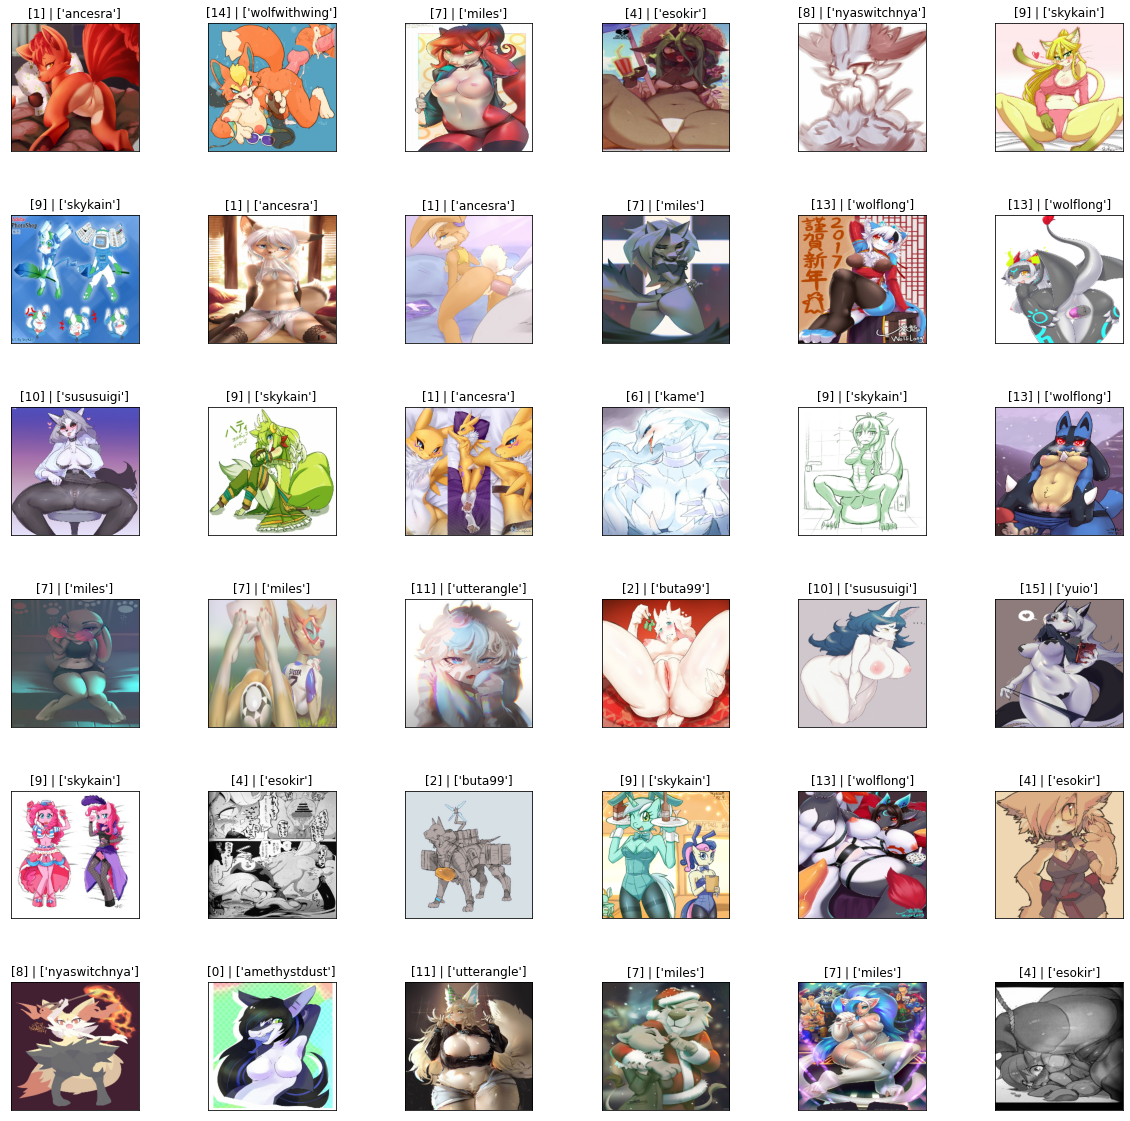

In [14]:
plt.figure(figsize=(20,20))
for i in range(36):

    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(Train_X[i])


    plt.title(str(Train_y[i])+ " | " + str(le.inverse_transform([Train_y[i]])))
plt.subplots_adjust(hspace=.5,wspace=0.5)
plt.show()

In [15]:
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256,256,3)),
    #32768
    keras.layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.001)),

    keras.layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(number_of_artists,activation='softmax')
])

model._name="test_model"
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 196608)            0         
                                                                 
 dense_39 (Dense)            (None, 512)               100663808 
                                                                 
 dense_40 (Dense)            (None, 128)               65664     
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 16)                1040      
                                                                 
Total params: 100,738,768
Trainable params: 100,738,768
Non-trainable params: 0
_________________________________________________________________


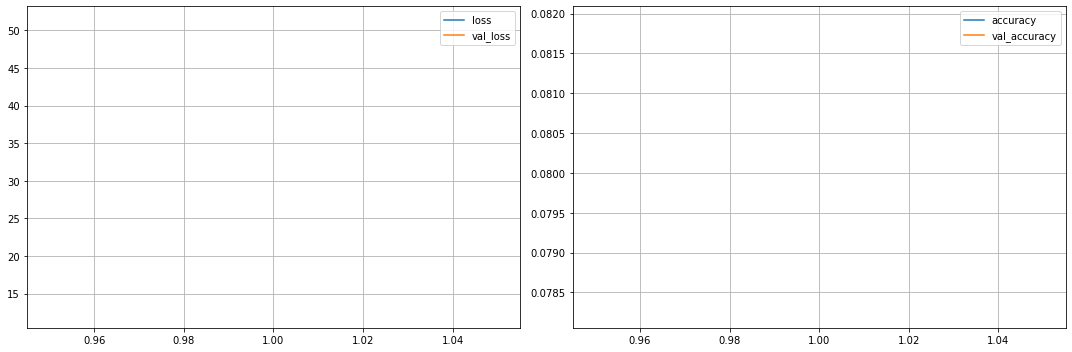

103/103 [==============================] - 81s 775ms/step - loss: 51.2608 - accuracy: 0.0819 - val_loss: 12.3984 - val_accuracy: 0.0782
Epoch 2/50
 83/103 [=======================>......] - ETA: 15s - loss: 8.6658 - accuracy: 0.0930

KeyboardInterrupt: 

In [30]:
callbacks_list = [PlotLearning()]

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# fit model to given data
model.fit(x=Train_X,
          y=Train_y,
          verbose=1,
          shuffle=True,
          validation_split=0.2,
          epochs=50,
          callbacks=callbacks_list
)